In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
X = pd.read_csv("xor-X.csv",header=None).as_matrix()
X.shape

(2, 200)

In [3]:
Y = pd.read_csv("xor-y.csv",header=None).as_matrix()

# to create a row vector
Y = Y.T
Y.shape

(1, 200)

In [4]:
# initialising constants
m = X.shape[1]
num_epochs = 100
num_trials = 100

In [5]:
def activation(Z):
    return 2*np.exp(-0.5*np.square(Z)) - 1

In [6]:
def loss_function(Y_hat,Y):
    return 0.5*np.sum((Y_hat-Y)**2)

In [7]:
# method for generating hyper paramerters on logarithmic scale
def generate_random_hyper_params():
    
    # selecting learning rate for theta  between 0.001 and 0.1
    r = -2*(np.random.random_sample()) - 1
    lr_theta = np.power(10,r)
    
    # selecting learning rate for weight vector  between 0.005 and 0.5
    r = -2*(np.random.random_sample()) - 1
    lr_W = np.power(10,r)*5
    
    return lr_W,lr_theta

In [8]:
#numpy array to store hyper parameters for plot
params = np.empty((num_trials,3))

In [9]:
for trials in range(num_trials):
    
    bestParams = (0,0)
    bestLoss = 99999999999
    loss = 0
    
    #initialising parameters and hyper parameters
    lr_W, lr_theta = generate_random_hyper_params()
    W = np.random.randn(2,1)
    theta = np.random.randn()
    
    for epoch in range(num_epochs):

        # forward propagation
        Z = np.dot(W.T,X) - theta
        Y_hat = activation(Z)
        loss = loss_function(Y_hat,Y)

        #backward propagation
        dE_dZ = (Y_hat-Y)*(Y_hat+1)*-Z
        dE_dW = (1/m)*np.dot(X,dE_dZ.T)
        dE_dtheta = -(1/m)*np.sum(dE_dZ)

        # gradient descent
        W = W - lr_W*dE_dW
        theta = theta - lr_theta*dE_dtheta
    
    # saving the best parameters
    if bestLoss > loss:
        bestParams = (W,theta)
        bestLoss = loss
    
    # saving hyper parameters
    params[trials,0] = lr_W
    params[trials,1] = lr_theta
    params[trials,2] = loss



In [10]:
params_df = pd.DataFrame({"Learning rate(W)":params[:,0],"Learning rate(theta)":params[:,1],"Loss":params[:,2]})

In [11]:
params_df.iloc[params_df["Loss"].idxmin()]

Learning rate(W)        0.241518
Learning rate(theta)    0.086621
Loss                    2.764351
Name: 99, dtype: float64

In [12]:
params_df["inverse_Loss"] = 1/params_df["Loss"]

/home/aakash/anaconda3/lib/python3.4/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


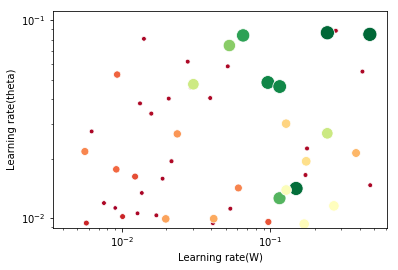

In [18]:
ax = sns.scatterplot(data=params_df,x = "Learning rate(W)",y="Learning rate(theta)",sizes=(20, 200),hue="inverse_Loss",size="inverse_Loss",palette=plt.cm.RdYlGn)
ax.get_legend().remove()
plt.yscale("log")
plt.xscale("log")
plt.show()

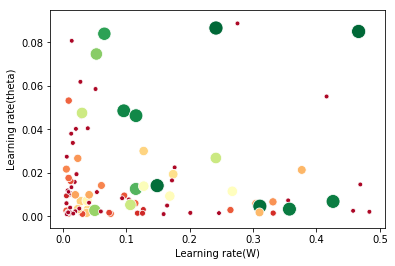

In [14]:
ax = sns.scatterplot(data=params_df,x = "Learning rate(W)",y="Learning rate(theta)",sizes=(20, 200),hue="inverse_Loss",size="inverse_Loss",palette=plt.cm.RdYlGn)
ax.get_legend().remove()
# plt.yscale("log")
# plt.xscale("log")
plt.show()

In [15]:
bestParams

(array([[-1.31793584],
        [-1.29738998]]), 0.0489278047706683)

In [16]:
def predict(X,params):
    W = params[0]
    theta = params[1]
    Z = np.dot(W.T,X.T) - theta
    Y = activation(Z)
    Y[Y<0] = -1
    Y[Y>=0] = 1
    return Y.T

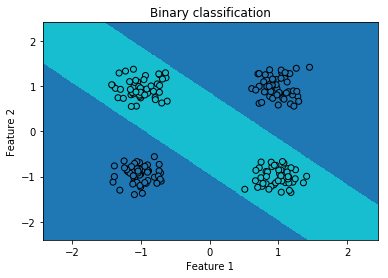

In [17]:
h = 0.01

# range of the visualisation
X_train = X.T
y=Y.T
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

#generating data for plotting
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# predicting the values for the mesh
Z = predict(np.c_[xx.ravel(), yy.ravel()],bestParams)
Z = Z.reshape(xx.shape)

#plotting the mesh
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab10)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y.reshape(y.shape[0],), cmap=plt.cm.tab10, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Binary classification")    
plt.show()